In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sp
import databento as db 
import zstandard as zstd
from databento import DBNStore

In [3]:
notebook_dir="/home/rupam/Rupam_pcloud/Quantitative Finance/Quant_researcher_Job/Strategic_prep/My_projects/"
data_path=notebook_dir+"Mini_S_and_P_futures_data/LOB_10/"

In [4]:
df = pd.read_parquet(data_path+"glbx-mdp3-20220202.mbp-10.parquet",engine="pyarrow")

In [5]:
# Basic Inspection
#df.shape  # shape of the datafarame
#df.head(2) # First two rows
#df.tail(1) # Last one row
#df.columns # Name of the columns
#df.info # Info about the dataframe
#df.dtypes # Data-types of each columns
#df.describe() # Descriptive statistics for numerical columns
#df.memory_usage()
# df.index # Gives the index of the dataframe 

In [6]:
df.columns

Index(['ts_event', 'rtype', 'publisher_id', 'instrument_id', 'action', 'side',
       'depth', 'price', 'size', 'flags', 'ts_in_delta', 'sequence',
       'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00', 'bid_ct_00',
       'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01',
       'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02', 'bid_sz_02',
       'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03', 'ask_px_03',
       'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03', 'bid_px_04',
       'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04', 'ask_ct_04',
       'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05', 'bid_ct_05',
       'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06',
       'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07', 'bid_sz_07',
       'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08', 'ask_px_08',
       'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08', 'bid_px_09',
       'ask_px_09', 'bid_sz_09', 'ask_sz_09', 'bid_ct_09', '

In [7]:
lvl_lst=['00']#,'02','04','06']
cols=['ts_event','price']+[col for col in df.columns if any(lvl in col for lvl in lvl_lst)]+['symbol']
cols

['ts_event',
 'price',
 'bid_px_00',
 'ask_px_00',
 'bid_sz_00',
 'ask_sz_00',
 'bid_ct_00',
 'ask_ct_00',
 'symbol']

In [8]:
df_small=df[cols]

In [9]:
df_small.head(2)

,ts_event,price,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
ts_recv,,,,,,,,,
1643760000000000000,1643572806508678951,9900000000,-38950000000,9750000000,1,1,1,1,ESH2-ESH3
1643760000000000000,1643677350784969787,-4950000000,-4950000000,9223372036854775807,1,0,1,0,ESM2-ESZ2


In [10]:
df_small.sort_values('ts_event')

,ts_event,price,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
ts_recv,,,,,,,,,
1643760000000000000,1643572806508678951,9900000000,-38950000000,9750000000,1,1,1,1,ESH2-ESH3
1643760000000000000,1643572806508678951,-5100000000,-38950000000,-5150000000,1,1,1,1,ESH2-ESZ2
1643760000000000000,1643677350784969787,-4950000000,-4950000000,9223372036854775807,1,0,1,0,ESM2-ESZ2
1643760000000000000,1643756400119123289,-5500000000,-5500000000,1350000000,2,2,1,1,ESM2-ESU2
1643760000000000000,1643757524822968275,-7500000000,-9750000000,-8350000000,2,2,1,1,ESH2-ESU2
...,...,...,...,...,...,...,...,...,...
1643846398321355530,1643846398321270887,4523250000000,4523250000000,4524500000000,2,1,2,1,ESM2
1643846398321362466,1643846398321275551,4521000000000,4520500000000,4523750000000,1,1,1,1,ESU2
1643846398478906670,1643846398478806097,4530500000000,4530750000000,4531250000000,6,12,6,8,ESH2


In [11]:
# Selection of rows and columns


#df['ts_event'] # Selecting one column by label
#df[['ts_event','rtype']] # Multiple columns
#df.iloc[1]  # Selcting column by integer position
#df.loc['2022-02-01 00:00:00+00:00']  # Selecting row by label


In [12]:
instrument_list=df_small['symbol'].unique()
df_small['symbol'].nunique()
instrument_list

11

array(['ESH2-ESH3', 'ESM2-ESZ2', 'ESH2-ESU2', 'ESH2', 'ESH3', 'ESM2-ESU2',
       'ESM2', 'ESZ2', 'ESU2', 'ESH2-ESZ2', 'ESH2-ESM2'], dtype=object)

In [13]:
df_small.iloc[2]

ts_event     1643757524822968275
price                -7500000000
bid_px_00            -9750000000
ask_px_00            -8350000000
bid_sz_00                      2
ask_sz_00                      2
bid_ct_00                      1
ask_ct_00                      1
symbol                 ESH2-ESU2
Name: 1643760000000000000, dtype: object

In [14]:
df_ESH2=df_small[(df_small['symbol']=="ESH2")&(df_small['price']!=9223372036854775807)].set_index('ts_event')

In [15]:
df_ESH2.index=pd.to_datetime(df_ESH2.index)

In [33]:
x=df_ESH2['2022-02-02 09:00:00':'2022-02-02 09:00:00.100']
x[x['bid_px_00']==x['bid_px_00'].max()]

,price,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
ts_event,,,,,,,,
2022-02-02 09:00:00.094303097,4555250000000,4555250000000,4555500000000,1,17,1,12,ESH2
2022-02-02 09:00:00.094303441,4555250000000,4555250000000,4555500000000,2,17,2,12,ESH2
2022-02-02 09:00:00.094311219,4555250000000,4555250000000,4555500000000,3,17,3,12,ESH2
2022-02-02 09:00:00.094348761,4555000000000,4555250000000,4555500000000,3,17,3,12,ESH2
2022-02-02 09:00:00.094416045,4555500000000,4555250000000,4555500000000,3,18,3,13,ESH2
2022-02-02 09:00:00.094570997,4555250000000,4555250000000,4555500000000,4,18,4,13,ESH2
2022-02-02 09:00:00.094571439,4555250000000,4555250000000,4555500000000,5,18,5,13,ESH2
2022-02-02 09:00:00.094628059,4556250000000,4555250000000,4555500000000,5,18,5,13,ESH2
2022-02-02 09:00:00.094631029,4555500000000,4555250000000,4555500000000,5,17,5,12,ESH2


In [25]:
def df_l0_intrvl(df,t1,t2,dt):
    df_t1t2=df.loc[t1:t2]
    t1=pd.Timestamp(t1)
    t2=pd.Timestamp(t2)
    dt=pd.Timedelta(milliseconds=dt)
    l0_book={}
    while t1+dt <= t2:
        df_dt=df_t1t2[t1:t1+dt]
        best_bid=df_dt['bid_px_00'].max()
        best_ask=df_dt['ask_px_00'].min()
        size_bid=df_dt[df_dt['bid_px_00']==best_bid]['bid_sz_00'].sum()
        size_ask=df_dt[df_dt['ask_px_00']==best_ask]['ask_sz_00'].sum()
        if (size_bid >0) & (size_ask>0) :
            l0_book[t1]=(best_bid,best_ask,size_bid,size_ask)
        t1=t1+dt
    df_l0=pd.DataFrame.from_dict(l0_book,orient='index',columns=['best_bid','best_ask','size_bid','size_ask'])
    df_l0.index.name='ts_event'

    return df_l0

        

In [35]:
df_l0_intrvl(df_ESH2,'2022-02-02 09:00:00','2022-02-02 09:10:00',100)

,best_bid,best_ask,size_bid,size_ask
ts_event,,,,
2022-02-02 09:00:00.000,4555250000000,4555250000000,192,136
2022-02-02 09:00:00.100,4555250000000,4555500000000,135,23
2022-02-02 09:00:00.200,4555250000000,4555500000000,48,5
2022-02-02 09:00:00.300,4555250000000,4555500000000,62,18
2022-02-02 09:00:00.400,4555250000000,4555500000000,30,26
...,...,...,...,...
2022-02-02 09:09:59.200,4562000000000,4562250000000,6,18
2022-02-02 09:09:59.300,4562000000000,4562250000000,2,9
2022-02-02 09:09:59.400,4562000000000,4562250000000,2,8


In [18]:
class BasicProp:
    def __init__(self,df):
        self.df=df
        self.lvl_list=lvl_lst
        
    def mid_price(self):
        mids={}
        for lvl in self.lvl_list:
            mids[f'mid_px_{lvl}']=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
        return pd.DataFrame(mids, index=self.df.index)
        
    def spread(self):
        sprd={}
        for lvl in self.lvl_list:
            sprd[f'spread_{lvl}']=self.df[f'ask_px_{lvl}']-self.df[f'bid_px_{lvl}']
        return pd.DataFrame(sprd, index=self.df.index)

    def rel_spread(self):
        rel_sprd={}
        for lvl in self.lvl_list:
            rel_sprd[f'rel_spread_{lvl}']=2*(self.df[f'ask_px_{lvl}']-self.df[f'bid_px_{lvl}'])/(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])
        return pd.DataFrame(rel_sprd, index=self.df.index)

    def ob_imbl(self):
        imbl={}
        for lvl in self.lvl_list:
            imbl[f'ob_imbl_{lvl}']=self.df[f'bid_sz_{lvl}']/self.df[f'bid_sz_{lvl}']+self.df[f'ask_sz_{lvl}']
        return pd.DataFrame(imbl, index=self.df.index)

    def quote_return(self,case:str):
        rtn={}
        for lvl in self.lvl_list:
            mid=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
            if case =='abs':
                rtn[f'abs_return_{lvl}']=mid.diff()/mid.shift(1)
            elif case =='log':
                rtn[f'log_return_{lvl}']=np.log(mid).diff()
        return pd.DataFrame(rtn, index=self.df.index)

    def volatility(self,win:int):
        vol={}
        for lvl in self.lvl_list:
            mid=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
            rtn=mid.diff()/mid.shift(1)
            vol[f'vol_{lvl}_{win}']=rtn.rolling(window=win).std()
        return pd.DataFrame(vol, index=self.df.index)


In [19]:
ESH2_basic=BasicProp(df_ESH2)

In [25]:
ESH2_basic.spread().std()*1e-9

spread_00    0.094032
spread_02    0.089995
spread_04    0.088397
spread_06    0.088070
dtype: float64

In [29]:
ESH2_basic.ob_imbl()

,ob_imbl_00,ob_imbl_02,ob_imbl_04,ob_imbl_06
ts_event,,,,
2022-01-31 23:59:59.971733295+00:00,10.0,15.0,23.0,26.0
2022-02-01 00:00:00.000486527+00:00,10.0,15.0,23.0,26.0
2022-02-01 00:00:00.003668709+00:00,10.0,15.0,23.0,26.0
2022-02-01 00:00:00.018315709+00:00,11.0,15.0,23.0,26.0
2022-02-01 00:00:00.018439925+00:00,11.0,15.0,23.0,26.0
...,...,...,...,...
2022-02-01 23:59:58.525084963+00:00,12.0,21.0,19.0,26.0
2022-02-01 23:59:58.525086845+00:00,12.0,21.0,19.0,26.0
2022-02-01 23:59:58.525193993+00:00,12.0,21.0,19.0,26.0


<Axes: xlabel='ts_event'>

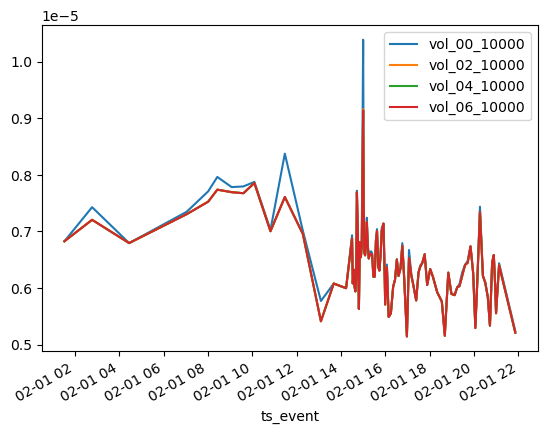

In [28]:
#ESH2_basic.mid_price().iloc[::1000].plot()
#ESH2_basic.spread().iloc[::1000].plot()
#ESH2_basic.rel_spread().loc['2022-02-01 15:00:00':'2022-02-01 16:00:00'].iloc[::10000].plot()
#ESH2_basic.ob_imbl().loc['2022-02-01 15:00:00':'2022-02-01 16:00:00'].iloc[::10000].plot()
#ESH2_basic.quote_return('log').iloc[::1000].plot()
ESH2_basic.volatility(10000).iloc[::100000].plot()